In [1]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import pandas as pd
import math
# %run 1.Sobol_sequence.ipynb
# %run 2.Hicks_Henne_NEW_Final.ipynb
# %run 3.Deformed_foil_generator.ipynb
# %run 4.Xfoil_runner_extract_value.ipynb

In [2]:
x1 = pd.read_excel('Design_parmeter.xlsx')
y1 = pd.read_excel('Cl_Cd.xlsx')

In [3]:
df = pd.merge(x1, y1)
df = df.dropna()
df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,CL,CD
0,0,0.0070,0.0086,-0.0027,-0.0027,-0.0072,0.0012,-0.0015,-0.0022,0.5337,0.00744
1,1,-0.0037,-0.0029,0.0047,0.0051,0.0089,-0.0050,0.0084,0.0031,0.6665,0.00935
2,2,-0.0077,0.0032,-0.0069,-0.0094,0.0025,-0.0023,-0.0078,0.0071,0.4826,0.00938
3,3,0.0016,-0.0077,0.0056,0.0021,-0.0010,0.0064,0.0022,-0.0076,0.5272,0.00923
4,4,0.0037,0.0014,0.0022,0.0042,-0.0032,0.0028,-0.0072,0.0088,0.6127,0.00903
...,...,...,...,...,...,...,...,...,...,...,...
254,254,-0.0036,0.0003,-0.0074,-0.0044,-0.0060,0.0086,-0.0074,0.0000,0.4574,0.00829
255,255,0.0069,-0.0056,0.0050,0.0066,0.0076,-0.0026,0.0030,-0.0047,0.5926,0.00901
256,256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5572,0.00848
257,257,0.0100,0.0100,0.0100,0.0100,-0.0100,-0.0100,-0.0100,-0.0100,0.5134,0.00866


In [4]:
len(df)

246

In [5]:
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'] ]
y = df[['CL', 'CD'] ]

In [6]:
X

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.0070,0.0086,-0.0027,-0.0027,-0.0072,0.0012,-0.0015,-0.0022
1,-0.0037,-0.0029,0.0047,0.0051,0.0089,-0.0050,0.0084,0.0031
2,-0.0077,0.0032,-0.0069,-0.0094,0.0025,-0.0023,-0.0078,0.0071
3,0.0016,-0.0077,0.0056,0.0021,-0.0010,0.0064,0.0022,-0.0076
4,0.0037,0.0014,0.0022,0.0042,-0.0032,0.0028,-0.0072,0.0088
...,...,...,...,...,...,...,...,...
254,-0.0036,0.0003,-0.0074,-0.0044,-0.0060,0.0086,-0.0074,0.0000
255,0.0069,-0.0056,0.0050,0.0066,0.0076,-0.0026,0.0030,-0.0047
256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
257,0.0100,0.0100,0.0100,0.0100,-0.0100,-0.0100,-0.0100,-0.0100


In [7]:
y

,CL,CD
0,0.5337,0.00744
1,0.6665,0.00935
2,0.4826,0.00938
3,0.5272,0.00923
4,0.6127,0.00903
...,...,...
254,0.4574,0.00829
255,0.5926,0.00901
256,0.5572,0.00848
257,0.5134,0.00866


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [13]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='linear'))

In [14]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)

In [15]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = tf.where(tf.equal(y_true, 0.0), 1e-10, y_true)
    ape = tf.abs((y_true - y_pred) / y_true)
    ape = tf.where(tf.math.is_finite(ape), ape, 0.0)
    mape = tf.reduce_mean(ape)
    
    return mape

In [16]:
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mse','mae',mean_absolute_percentage_error])

In [17]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200


10/10 [==============================] - 1s 32ms/step - loss: 0.5911 - mse: 0.4261 - mae: 0.5021 - mean_absolute_percentage_error: 20.5365 - val_loss: 0.3882 - val_mse: 0.1654 - val_mae: 0.3041 - val_mean_absolute_percentage_error: 12.7108
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.2966 - mse: 0.0870 - mae: 0.2155 - mean_absolute_percentage_error: 9.3196 - val_loss: 0.1906 - val_mse: 0.0251 - val_mae: 0.1135 - val_mean_absolute_percentage_error: 5.9566
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1958 - mse: 0.0254 - mae: 0.1220 - mean_absolute_percentage_error: 6.0821 - val_loss: 0.1773 - val_mse: 0.0218 - val_mae: 0.1080 - val_mean_absolute_percentage_error: 5.9071
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1594 - mse: 0.0159 - mae: 0.0937 - mean_absolute_percentage_error: 4.2572 - val_loss: 0.1350 - val_mse: 0.0108 - val_mae: 0.0739 - val_mean_absolute_percentage_error: 3.5517

Epoch 63/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 4.3080e-04 - mae: 0.0133 - mean_absolute_percentage_error: 0.2376 - val_loss: 0.0106 - val_mse: 3.2777e-04 - val_mae: 0.0101 - val_mean_absolute_percentage_error: 0.1728
Epoch 64/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0113 - mse: 3.4452e-04 - mae: 0.0108 - mean_absolute_percentage_error: 0.1864 - val_loss: 0.0118 - val_mse: 3.4075e-04 - val_mae: 0.0112 - val_mean_absolute_percentage_error: 0.1149
Epoch 65/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - mse: 2.7828e-04 - mae: 0.0103 - mean_absolute_percentage_error: 0.1072 - val_loss: 0.0119 - val_mse: 3.6449e-04 - val_mae: 0.0113 - val_mean_absolute_percentage_error: 0.1385
Epoch 66/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0111 - mse: 3.0588e-04 - mae: 0.0105 - mean_absolute_percentage_error: 0.1202 - val_loss: 0.0134 - val_mse: 4.4217e-04 - val_mae: 0.0128 - val_mean_ab

Epoch 95/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0116 - mse: 2.8898e-04 - mae: 0.0109 - mean_absolute_percentage_error: 0.1911 - val_loss: 0.0111 - val_mse: 3.5603e-04 - val_mae: 0.0104 - val_mean_absolute_percentage_error: 0.0983
Epoch 96/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - mse: 2.7412e-04 - mae: 0.0100 - mean_absolute_percentage_error: 0.1630 - val_loss: 0.0103 - val_mse: 3.2366e-04 - val_mae: 0.0097 - val_mean_absolute_percentage_error: 0.1794
Epoch 97/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0108 - mse: 2.9217e-04 - mae: 0.0101 - mean_absolute_percentage_error: 0.1827 - val_loss: 0.0121 - val_mse: 3.3709e-04 - val_mae: 0.0115 - val_mean_absolute_percentage_error: 0.2605
Epoch 98/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0111 - mse: 2.7546e-04 - mae: 0.0105 - mean_absolute_percentage_error: 0.1722 - val_loss: 0.0111 - val_mse: 2.7860e-04 - val_mae: 0.0104 - val_mean_ab

Epoch 127/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - mse: 2.7243e-04 - mae: 0.0094 - mean_absolute_percentage_error: 0.0695 - val_loss: 0.0120 - val_mse: 3.6518e-04 - val_mae: 0.0113 - val_mean_absolute_percentage_error: 0.1096
Epoch 128/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0111 - mse: 3.0967e-04 - mae: 0.0104 - mean_absolute_percentage_error: 0.0815 - val_loss: 0.0139 - val_mse: 4.4765e-04 - val_mae: 0.0132 - val_mean_absolute_percentage_error: 0.1061
Epoch 129/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0113 - mse: 3.1135e-04 - mae: 0.0106 - mean_absolute_percentage_error: 0.0638 - val_loss: 0.0122 - val_mse: 4.1032e-04 - val_mae: 0.0115 - val_mean_absolute_percentage_error: 0.0757
Epoch 130/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0103 - mse: 2.5698e-04 - mae: 0.0097 - mean_absolute_percentage_error: 0.0805 - val_loss: 0.0092 - val_mse: 2.1795e-04 - val_mae: 0.0086 - val_mea

Epoch 159/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0105 - mse: 2.5396e-04 - mae: 0.0098 - mean_absolute_percentage_error: 0.1088 - val_loss: 0.0100 - val_mse: 2.4698e-04 - val_mae: 0.0093 - val_mean_absolute_percentage_error: 0.1485
Epoch 160/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0108 - mse: 2.8851e-04 - mae: 0.0101 - mean_absolute_percentage_error: 0.1236 - val_loss: 0.0143 - val_mse: 4.8197e-04 - val_mae: 0.0136 - val_mean_absolute_percentage_error: 0.1695
Epoch 161/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - mse: 2.7443e-04 - mae: 0.0102 - mean_absolute_percentage_error: 0.1232 - val_loss: 0.0083 - val_mse: 2.5480e-04 - val_mae: 0.0076 - val_mean_absolute_percentage_error: 0.0819
Epoch 162/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - mse: 2.7622e-04 - mae: 0.0099 - mean_absolute_percentage_error: 0.1331 - val_loss: 0.0126 - val_mse: 3.8862e-04 - val_mae: 0.0119 - val_mea

Epoch 191/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0104 - mse: 2.7574e-04 - mae: 0.0097 - mean_absolute_percentage_error: 0.0468 - val_loss: 0.0094 - val_mse: 2.6372e-04 - val_mae: 0.0087 - val_mean_absolute_percentage_error: 0.0591
Epoch 192/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - mse: 2.6085e-04 - mae: 0.0093 - mean_absolute_percentage_error: 0.0825 - val_loss: 0.0120 - val_mse: 3.9916e-04 - val_mae: 0.0113 - val_mean_absolute_percentage_error: 0.0672
Epoch 193/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0104 - mse: 2.8425e-04 - mae: 0.0097 - mean_absolute_percentage_error: 0.0814 - val_loss: 0.0095 - val_mse: 2.7595e-04 - val_mae: 0.0089 - val_mean_absolute_percentage_error: 0.0467
Epoch 194/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0109 - mse: 2.6390e-04 - mae: 0.0102 - mean_absolute_percentage_error: 0.1138 - val_loss: 0.0103 - val_mse: 2.9854e-04 - val_mae: 0.0096 - val_mea

In [18]:
loss = model.evaluate(X_test, y_test)
loss

2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - mse: 2.2520e-04 - mae: 0.0086 - mean_absolute_percentage_error: 0.0424


[0.009327054023742676,
 0.00022519986669067293,
 0.008590697310864925,
 0.042388156056404114]

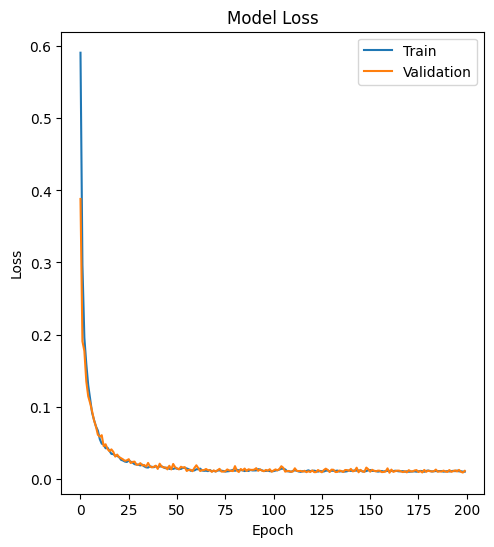

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [20]:
predictions = model.predict(X_test)
# predictions

2/2 [==============================] - 0s 3ms/step


In [21]:
y_test = np.array(y_test)
# y_test

In [22]:
absolute_errors = np.abs(predictions - y_test)
# absolute_errors

In [23]:
percentage_errors = (absolute_errors / np.abs(y_test)) * 100

In [24]:
mean_percentage_error_Cl = np.mean(percentage_errors[:, 0])  
mean_percentage_error_Cd = np.mean(percentage_errors[:, 1]) 

In [25]:
mean_percentage_error_Cl

3.158316295812915

In [26]:
mean_percentage_error_Cd

5.000548289129722

In [27]:
predictions = model.predict(X_train)
y_train = np.array(y_train)
absolute_errors = np.abs(predictions - y_train)
percentage_errors = (absolute_errors / np.abs(y_train)) * 100 

7/7 [==============================] - 0s 1ms/step


In [28]:
mean_percentage_error_Cl = np.mean(percentage_errors[:, 0])  
mean_percentage_error_Cd = np.mean(percentage_errors[:, 1]) 

In [29]:
mean_percentage_error_Cl

3.027028640764043

In [30]:
mean_percentage_error_Cd

4.314124376550285

In [33]:
import joblib

In [34]:
# joblib.dump(model, 'model__01.joblib')
# joblib.dump(scaler, 'scaler_file__01.joblib')

['scaler_file__01.joblib']